# Projeto 3

### Alura - Curso: Machine Learning: classificação com SKLearn</br>Professor Guilherme Silveira</br>14/07/2022 

#### Base de dados contendo pesquisas realizadas em um site:
* home - representa a página principal;
* busca - texto informado no campo de pesquisa;
* logado - se usuário estava logado;
* comprou - (1-comprou) ou (2-não comprou) algum curso.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
# link combinado com /export?gid=0&format=csv já traz no formato csv
uri = 'https://docs.google.com/spreadsheets/d/1Ax2LfJ5MK7O8OZBQsgYnHHnGX1qgotpqTjvo9-FURkY/export?gid=0&format=csv'

df_pesquisas = pd.read_csv(uri)

In [3]:
df_pesquisas.head()

,home,busca,logado,comprou
0,0,algoritmos,1,1
1,0,java,0,1
2,1,algoritmos,0,1
3,1,ruby,1,0
4,1,ruby,0,1


### Descrevendo variáveis numéricas

In [4]:
df_pesquisas.describe()

,home,logado,comprou
count,1000.000000,1000.000000,1000.000000
mean,0.502000,0.509000,0.832000
std,0.500246,0.500169,0.374053
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


### Descrevendo variáveis categóricas

In [5]:
df_pesquisas.busca.unique()

array(['algoritmos', 'java', 'ruby'], dtype=object)

In [6]:
df_pesquisas.busca.describe()

count     1000
unique       3
top       ruby
freq       361
Name: busca, dtype: object

In [7]:
# Tamanho em bytes para os dados categóricos antes de converter
df_pesquisas.busca.nbytes

8000

In [8]:
# Transformando em dados categóricos
df_pesquisas.busca = df_pesquisas.busca.astype('category')

In [9]:
# Tamanho em bytes para os dados categóricos diminui consideravelmente
df_pesquisas.busca.nbytes

1024

In [10]:
# Tempo de processamento diminui
%time teste_tempo_processamento = df_pesquisas.busca == 'ruby'

CPU times: total: 0 ns
Wall time: 998 µs


### Visualizando clientes que compraram vs não compraram

1    0.832
0    0.168
Name: comprou, dtype: float64


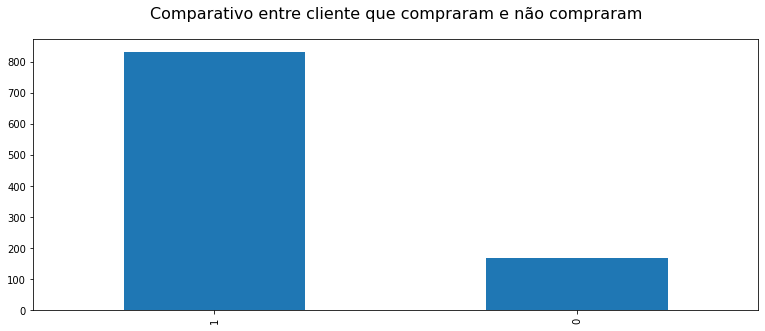

In [11]:
print(df_pesquisas['comprou'].value_counts(normalize=True))

plt.figure(figsize=(13, 5))
plt.title("Comparativo entre cliente que compraram e não compraram", fontsize=16, pad=20)
df_pesquisas['comprou'].value_counts().plot(kind='bar')
plt.show()

<font color='red'>
    Quantidades discrepantes, isso significa que se chutarmos sempre 1 teriamos uma chance de acerto de 83,2% para essa base de dados.
</font>

### Tratamento de variáveis categórica

In [12]:
df_dummies = pd.get_dummies(df_pesquisas.busca)

df_dummies.head()

,algoritmos,java,ruby
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1


In [13]:
df_pesquisas = pd.concat([df_pesquisas, df_dummies], axis=1)

df_pesquisas.head()

,home,busca,logado,comprou,algoritmos,java,ruby
0,0,algoritmos,1,1,1,0,0
1,0,java,0,1,0,1,0
2,1,algoritmos,0,1,1,0,0
3,1,ruby,1,0,0,0,1
4,1,ruby,0,1,0,0,1


### Seleção dos atributos independentes X e dependentes y

In [14]:
X = df_pesquisas[['home', 'logado', 'algoritmos', 'java', 'ruby']]
y = df_pesquisas['comprou']

### Seleção de base de treino 80%, teste 10% e validação 10%
Utilizando train_test_split do SKLearn</br>
parâmetro test_size informamos 0.2 que representa 20% dos dados para treino</br>
stratify informa que a seleção deve ser estratificado de acordo com os atributos dependentes y</br>
random_state para termos os mesmos resultados sem que for reexecutado.

In [15]:
SEED = 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

print(f'Treino com {X_train.shape[0]} usuarios')
print(f'Serão divididos entre teste e validação - {X_test.shape[0]} usuários.')

Treino com 800 usuarios
Serão divididos entre teste e validação - 200 usuários.


In [16]:
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=SEED)

print(f'Teste com {X_test.shape[0]} usuarios, e validação com {X_validation.shape[0]} usuários.')

Teste com 100 usuarios, e validação com 100 usuários.


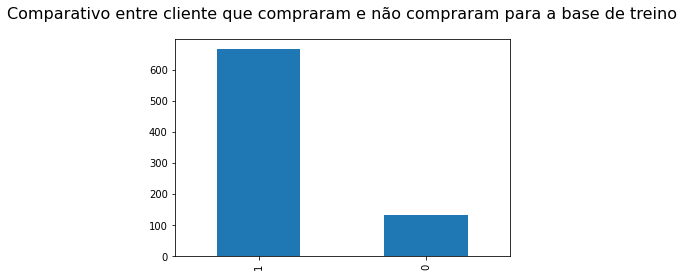

In [17]:
plt.title("Comparativo entre cliente que compraram e não compraram para a base de treino", fontsize=16, pad=20)
y_train.value_counts().plot(kind='bar')
plt.show()

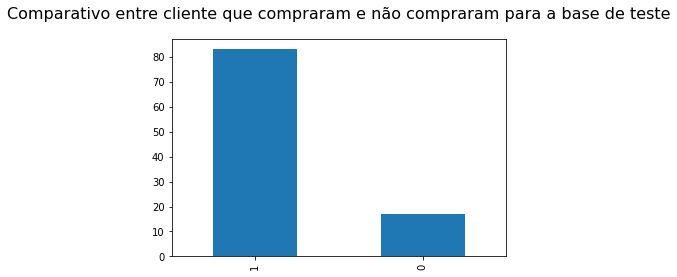

In [18]:
plt.title("Comparativo entre cliente que compraram e não compraram para a base de teste", fontsize=16, pad=20)
y_test.value_counts().plot(kind='bar')
plt.show()

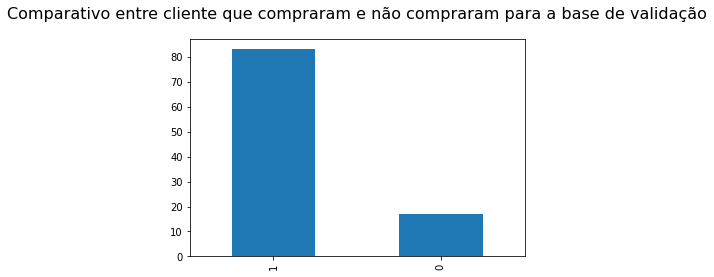

In [19]:
plt.title("Comparativo entre cliente que compraram e não compraram para a base de validação", fontsize=16, pad=20)
y_validation.value_counts().plot(kind='bar')
plt.show()

### Avaliando com um modelo DummyClassifier
Se não houvesse modelo nenhum, qual seria meu grau de acertos? Será minha linha de base para comparar com os modelos que serão criados.

#### Estratégias utilizadas pelo DummyClassifier:
* most_frequent  - sempre retorna o rótulo de classe mais frequente
* prior *Default - sempre retorna o rótulo de classe mais frequente
* stratified     - proporcional aos dados de entrada
* uniform        - gera previsões uniformemente aleatoriamente
* constant       - sempre prevê um rótulo constante fornecido pelo usuário

In [20]:
dummy = DummyClassifier(strategy='most_frequent', random_state=SEED)
dummy.fit(X_train, y_train)

previsoes = dummy.predict(X_test)

taxa_acertos =  accuracy_score(y_test, previsoes) * 100
print(f'Percentual de acurácia do DummyClassifier most_frequent - {(taxa_acertos):.2f}%')
print(f'Percentual de acurácia do DummyClassifier most_frequent - {(dummy.score(X_test, y_test) * 100):.2f}%')

Percentual de acurácia do DummyClassifier most_frequent - 83.00%
Percentual de acurácia do DummyClassifier most_frequent - 83.00%


In [21]:
dummy = DummyClassifier(strategy='prior', random_state=SEED)
dummy.fit(X_train, y_train)

previsoes = dummy.predict(X_test)

taxa_acertos =  accuracy_score(y_test, previsoes) * 100
print(f'Percentual de acurácia do DummyClassifier prior - {(taxa_acertos):.2f}%')
print(f'Percentual de acurácia do DummyClassifier prior - {(dummy.score(X_test, y_test) * 100):.2f}%')

Percentual de acurácia do DummyClassifier prior - 83.00%
Percentual de acurácia do DummyClassifier prior - 83.00%


In [22]:
dummy = DummyClassifier(strategy='stratified', random_state=SEED)
dummy.fit(X_train, y_train)

previsoes = dummy.predict(X_test)

taxa_acertos =  accuracy_score(y_test, previsoes) * 100
print(f'Percentual de acurácia do DummyClassifier stratified - {(taxa_acertos):.2f}%')
print(f'Percentual de acurácia do DummyClassifier stratified - {(dummy.score(X_test, y_test) * 100):.2f}%')

Percentual de acurácia do DummyClassifier stratified - 72.00%
Percentual de acurácia do DummyClassifier stratified - 72.00%


<font color='green'>Com o modelo aleatório alcançamos 83% de acerto, essa é a linha de base para comparação de novos modelos.</font>

### Criando o modelo MultinomialNB da biblioteca SKLearn
* instânciar;
* treinar;
* prever;
* avaliar.

In [23]:
# instânciar
cls_multinomial_nb = MultinomialNB()

# treinar
cls_multinomial_nb.fit(X_train, y_train)

# prever
previsoes = cls_multinomial_nb.predict(X_test)

# avaliar
acertos = (previsoes == y_test).sum()
print(f'Total de acertos - {acertos}')

taxa_acertos =  (acertos / X_test.shape[0]) * 100
print(f'Percentual de acurácia - {(taxa_acertos):.2f}%')

taxa_acertos =  accuracy_score(y_test, previsoes) * 100
print(f'Percentual de acurácia - {(taxa_acertos):.2f}%')

taxa_acertos =  cls_multinomial_nb.score(X_test, y_test) * 100
print(f'Percentual de acurácia - {(taxa_acertos):.2f}%')

Total de acertos - 83
Percentual de acurácia - 83.00%
Percentual de acurácia - 83.00%
Percentual de acurácia - 83.00%


<font color='red'>Modelo considerado ruim, pois conseguiu somente alcançar a acurácio do modelo aleatório, que retorna sem 1 por exemplo.</font>

### AdaBoost
Estimador: DecisionTreeClassifier

In [24]:
mapa = {0: 'nao', 1: 'sim'}

In [25]:
# Adaboost com árvores mínimas
# instânciar
ada = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3), algorithm='SAMME', n_estimators=20)

# treinar
ada.fit(X_train, y_train)

# prever
previsoes = ada.predict(X_test)

In [26]:
# avaliar
print("Classificador AdaBoost:\n AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3), algorithm='SAMME', n_estimators=20\n")

print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(ada.score(X_train, y_train)))
print("--------------------------------------", end='\n\n')

acertos = (previsoes == y_test).sum()
print(f'Total de acertos da base de teste - {acertos}', end='\n\n')


print(classification_report(y_test, previsoes, target_names=mapa.values()))

cnf_matrix = confusion_matrix(y_test, previsoes)
cnf_table = pd.DataFrame(data=cnf_matrix, index=mapa.values(), columns=[x + "(prev)" for x in mapa.values()])
print(cnf_table)

Classificador AdaBoost:
 AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3), algorithm='SAMME', n_estimators=20

--------------------------------------
Acurácia da base de treinamento: 0.86
--------------------------------------

Total de acertos da base de teste - 84

              precision    recall  f1-score   support

         nao       0.55      0.35      0.43        17
         sim       0.88      0.94      0.91        83

    accuracy                           0.84       100
   macro avg       0.71      0.65      0.67       100
weighted avg       0.82      0.84      0.83       100

     nao(prev)  sim(prev)
nao          6         11
sim          5         78


### Revendo acurácio de todos os modelos com os Dados de Teste

In [27]:
taxa_acertos = dummy.score(X_test, y_test) * 100
print(f'Percentual de acurácia do DummyClassifier    - {(taxa_acertos):.2f}%')

taxa_acertos =  cls_multinomial_nb.score(X_test, y_test) * 100
print(f'Percentual de acurácia do MultinomialNB      - {(taxa_acertos):.2f}%')

taxa_acertos =  ada.score(X_test, y_test) * 100
print(f'Percentual de acurácia do AdaBoostClassifier - {(taxa_acertos):.2f}%')

Percentual de acurácia do DummyClassifier    - 72.00%
Percentual de acurácia do MultinomialNB      - 83.00%
Percentual de acurácia do AdaBoostClassifier - 84.00%


### Validação final com os Dados de Validação

In [28]:
taxa_acertos = dummy.score(X_validation, y_validation) * 100
print(f'Percentual de acurácia do DummyClassifier    - {(taxa_acertos):.2f}%')

taxa_acertos =  cls_multinomial_nb.score(X_validation, y_validation) * 100
print(f'Percentual de acurácia do MultinomialNB      - {(taxa_acertos):.2f}%')

taxa_acertos =  ada.score(X_validation, y_validation) * 100
print(f'Percentual de acurácia do AdaBoostClassifier - {(taxa_acertos):.2f}%')

Percentual de acurácia do DummyClassifier    - 76.00%
Percentual de acurácia do MultinomialNB      - 83.00%
Percentual de acurácia do AdaBoostClassifier - 81.00%


### Avaliando se o atributo fosse 'sim' ou 'nao' o modelo ainda funcionaria

In [29]:
y_train_sn = y_train.map(mapa)
y_test_sn = y_test.map(mapa)

y_train_sn.head()

267    sim
599    nao
574    sim
34     sim
676    sim
Name: comprou, dtype: object

In [30]:
# instânciar
cls_multinomial_nb = MultinomialNB()

# treinar
cls_multinomial_nb.fit(X_train, y_train_sn)

# prever
previsoes = cls_multinomial_nb.predict(X_test)

# avaliar
acertos = (previsoes == y_test_sn).sum()
print(f'Total de acertos - {acertos}')

taxa_acertos =  cls_multinomial_nb.score(X_test, y_test_sn) * 100
print(f'Percentual de acurácia - {(taxa_acertos):.2f}%')

Total de acertos - 83
Percentual de acurácia - 83.00%


In [31]:
previsoes[:10]

array(['sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'sim',
       'sim'], dtype='<U3')